In [199]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [200]:
titanic = pd.read_csv(r"D:\APOTEK DATA\train.csv")
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [201]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [202]:
titanic = titanic.drop(columns=['Cabin','PassengerId','Name','Ticket'])
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


<Axes: xlabel='Survived', ylabel='count'>

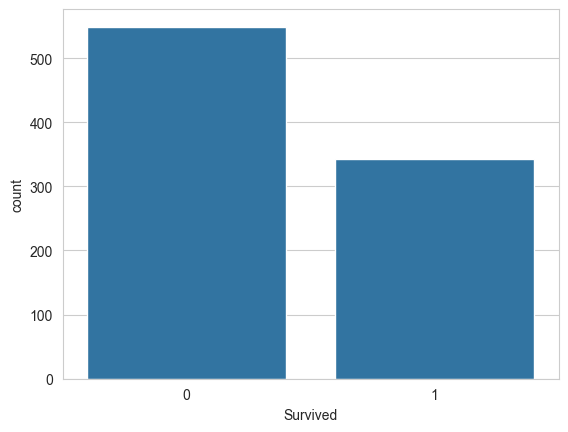

In [203]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', data= titanic)

<Axes: xlabel='Survived', ylabel='count'>

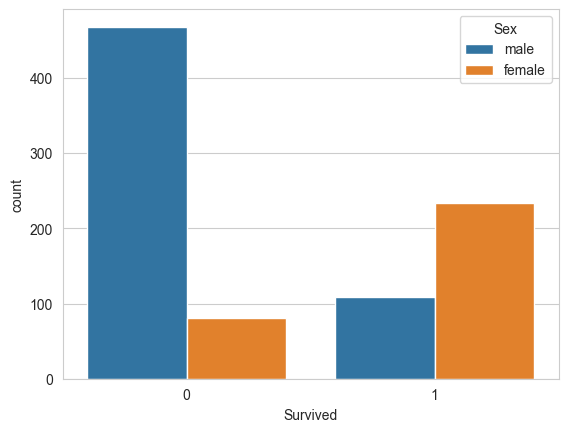

In [204]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex', data= titanic)

<Axes: xlabel='Survived', ylabel='count'>

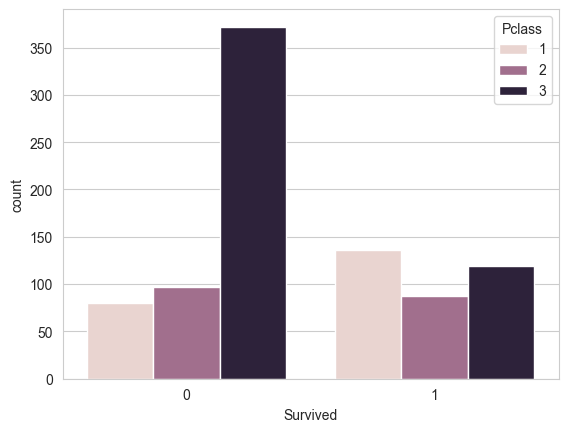

In [205]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass', data= titanic)

<Axes: xlabel='SibSp', ylabel='count'>

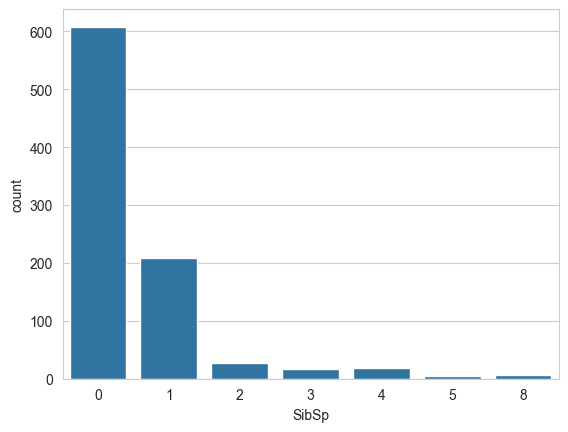

In [206]:
sns.set_style('whitegrid')
sns.countplot(x='SibSp',data= titanic)

<Axes: >

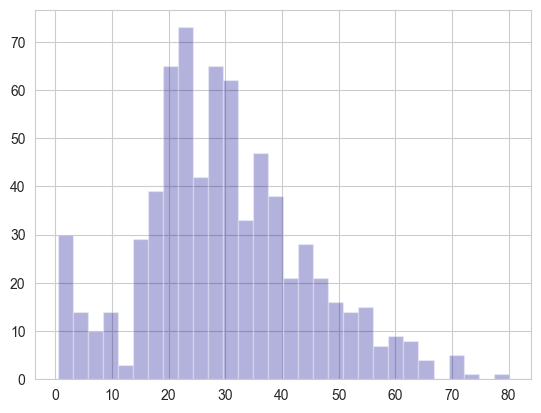

In [207]:
titanic['Age'].hist(bins=30,color='darkblue',alpha=0.3)

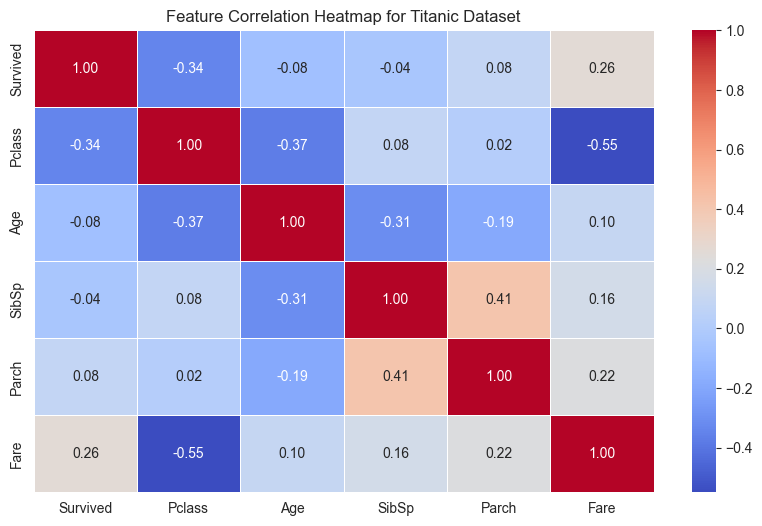

In [208]:

correlation_matrix = titanic.select_dtypes(include=['float64', 'int64']).corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Feature Correlation Heatmap for Titanic Dataset')
plt.show()

In [209]:

group_medians = titanic.groupby(['Pclass', 'Sex'])['Age'].median()
titanic['Age'] = titanic.apply(
    lambda row: group_medians[row['Pclass'], row['Sex']] if pd.isnull(row['Age']) else row['Age'],
    axis=1
)
print(titanic['Age'].isnull().sum())  


0


In [210]:

group_modes = titanic.groupby(['Pclass', 'Sex'])['Embarked'].agg(lambda x: x.mode()[0])
titanic['Embarked'] = titanic.apply(
    lambda row: group_modes[row['Pclass'], row['Sex']] if pd.isnull(row['Embarked']) else row['Embarked'],
    axis=1
)
print(titanic['Embarked'].isnull().sum())


0


In [211]:
titanic.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [212]:
pd.get_dummies(titanic['Embarked'],drop_first=True).head()

,Q,S
0,False,True
1,False,False
2,False,True
3,False,True
4,False,True


In [213]:
sex = pd.get_dummies(titanic['Sex'],drop_first=True)
embark = pd.get_dummies(titanic['Embarked'],drop_first=True)

In [214]:
titanic.drop(['Sex','Embarked'],axis=1, inplace=True)
titanic.head()

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500


In [215]:
titanic = pd.concat([titanic,sex,embark], axis = 1)
titanic.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,True,False,True
1,1,1,38.0,1,0,71.2833,False,False,False
2,1,3,26.0,0,0,7.9250,False,False,True
3,1,1,35.0,1,0,53.1000,False,False,True
4,0,3,35.0,0,0,8.0500,True,False,True


In [216]:
titanic.drop('Survived', axis=1).head()
titanic['Survived'].head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [217]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    titanic.drop('Survived', axis=1), 
    titanic['Survived'],             
    test_size=0.20,                  
    random_state=42                  
)


In [218]:
from sklearn.linear_model import LogisticRegression
model= LogisticRegression()
model.fit(X_train,y_train)
predictions = model.predict(X_test)

c:\Users\kakor\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [219]:
from sklearn.metrics import confusion_matrix
accuracy = confusion_matrix(y_test,predictions)
accuracy

array([[91, 14],
       [19, 55]], dtype=int64)

In [220]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test,predictions)
accuracy

0.8156424581005587

In [221]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV


rf = RandomForestClassifier(random_state=101)
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

print(grid_search.best_params_)


best_rf = grid_search.best_estimator_

y_pred = best_rf.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")


Fitting 5 folds for each of 27 candidates, totalling 135 fits
{'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 200}
Accuracy: 0.8324022346368715


INSIGHTS GAINED
1.Survival by Class (Pclass):
Passengers in Pclass 1 (first class) had the highest survival rate, while passengers in Pclass 3 (third class) had the lowest survival rate. This indicates that socioeconomic status played a significant role in survival, with higher-class passengers having better access to lifeboats and survival opportunities.

2.Survival by Gender (Sex):
Females had a significantly higher survival rate compared to males. This is in line with the "women and children first" policy followed during the Titanic disaster.

3.Survival by Age:
Children and elderly passengers had higher survival rates. The younger passengers were prioritized for lifeboats, and older adults had a better chance of survival as well, likely due to the perception of needing more help.

4.Survival by SibSp (Siblings/Spouse):
Passengers traveling with more siblings or spouses had a lower survival rate. This suggests that families were often kept together, and not all family members were able to escape.

5.Survival by Embarked:
Passengers who boarded at Cherbourg (C) had the highest survival rate, followed by those who boarded at Southampton (S). Passengers from Queenstown (Q) had the lowest survival rate.

6.Fare and Survival:
Passengers who paid higher fares, particularly in first class, had a better chance of survival. This reflects the disparity in access to lifeboats and resources between different classes.

7.Age and Pclass:
The first-class passengers were generally older than those in second and third class. The age distribution shows that first-class passengers had more of an advantage in terms of survival opportunities.

NOTE:
>Missing Values
The dataset had missing values in Age, Embarked, and Cabin. Age was imputed with the median, and Embarked was imputed with the mode. The Cabin column had too many missing values, so it was dropped.

>Correlation
There is a moderate correlation between Pclass and Survived, and a weak correlation between Fare and Survived. Other variables, such as Age and SibSp, show weaker correlations with survival.
